# 인공신경망을 이용한 주택가격지수 예측

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pydot
import graphviz 
from numpy import unique
from numpy import argmax
import math
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI 2021/Dataset/house_dataset(micro_macro).csv")

In [4]:
for i in range(df.shape[0]):
    df["Date"][i]=df["Date"][i][0:4]+df["Date"][i][6:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
X = np.array(df.iloc[:,1:-1])
y = np.array(df.iloc[:,-1])

In [6]:
X.shape

(168, 12)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

### Train : 0~143( ~ 2018)
### test : 144~ (2019 ~)

In [8]:
X_macro_train=X[:144,:6]
X_macro_test=X[144:,:6]
X_micro_train=X[:144,6:]
X_micro_test=X[144:,6:]

y_train = y[:144]
y_test = y[144:]

# Macro data (CASE 1)
---

In [11]:
from keras.layers import TimeDistributed
look_back = 6
n_timesteps = 10
trainX = np.reshape(X_macro_train, (X_macro_train.shape[0], 1, X_macro_train.shape[1]))
testX = np.reshape(X_macro_test, (X_macro_test.shape[0], 1, X_macro_test.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='mse', optimizer='adam')

model.fit(trainX, y_train, epochs=1000, batch_size=1, verbose=2)

# evaluate on test set
preds = model.predict(testX)

preds1=np.reshape(preds,(preds.shape[0],))

case1 = np.concatenate((y_train,preds1),axis=0)

tf.keras.backend.clear_session()

ValueError: ignored

# Micro data (CASE 2)
---

In [ ]:
look_back = 6
trainX = np.reshape(X_micro_train, (X_micro_train.shape[0], 1, X_micro_train.shape[1]))
testX = np.reshape(X_micro_test, (X_micro_test.shape[0], 1, X_micro_test.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back),activation='relu' ))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, y_train, epochs=1000, batch_size=1, verbose=2)

# evaluate on test set
preds = model.predict(testX)

preds2=np.reshape(preds,(preds.shape[0],))

case2 = np.concatenate((y_train,preds2),axis=0)

tf.keras.backend.clear_session()

Epoch 1/1000
144/144 - 1s - loss: 7052.7900
Epoch 2/1000
144/144 - 0s - loss: 6727.9707
Epoch 3/1000
144/144 - 0s - loss: 5825.4927
Epoch 4/1000
144/144 - 0s - loss: 4460.9697
Epoch 5/1000
144/144 - 0s - loss: 3158.4761
Epoch 6/1000
144/144 - 0s - loss: 2207.4104
Epoch 7/1000
144/144 - 0s - loss: 1538.3817
Epoch 8/1000
144/144 - 0s - loss: 1038.5087
Epoch 9/1000
144/144 - 0s - loss: 693.6204
Epoch 10/1000
144/144 - 0s - loss: 476.8434
Epoch 11/1000
144/144 - 0s - loss: 351.1868
Epoch 12/1000
144/144 - 0s - loss: 283.7992
Epoch 13/1000
144/144 - 0s - loss: 241.4007
Epoch 14/1000
144/144 - 0s - loss: 212.1557
Epoch 15/1000
144/144 - 0s - loss: 188.1089
Epoch 16/1000
144/144 - 0s - loss: 167.6258
Epoch 17/1000
144/144 - 0s - loss: 149.4424
Epoch 18/1000
144/144 - 0s - loss: 131.4811
Epoch 19/1000
144/144 - 0s - loss: 115.4187
Epoch 20/1000
144/144 - 0s - loss: 101.3022
Epoch 21/1000
144/144 - 0s - loss: 87.8423
Epoch 22/1000
144/144 - 0s - loss: 76.7442
Epoch 23/1000
144/144 - 0s - loss: 

# All data (CASE 3)
---

In [ ]:
look_back = 12
X_train=X[:144,]
X_test=X[144:,]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back),activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, y_train, epochs=1000, batch_size=1, verbose=2)

# evaluate on test set
preds = model.predict(testX)

preds3=np.reshape(preds,(preds.shape[0],))

case3 = np.concatenate((y_train,preds3),axis=0)

tf.keras.backend.clear_session()

Epoch 1/1000
144/144 - 1s - loss: 7001.3530
Epoch 2/1000
144/144 - 0s - loss: 6351.4727
Epoch 3/1000
144/144 - 0s - loss: 4877.3652
Epoch 4/1000
144/144 - 0s - loss: 3116.2346
Epoch 5/1000
144/144 - 0s - loss: 1761.3947
Epoch 6/1000
144/144 - 0s - loss: 1016.2860
Epoch 7/1000
144/144 - 0s - loss: 671.1516
Epoch 8/1000
144/144 - 0s - loss: 514.1693
Epoch 9/1000
144/144 - 0s - loss: 430.3823
Epoch 10/1000
144/144 - 0s - loss: 377.5400
Epoch 11/1000
144/144 - 0s - loss: 336.9213
Epoch 12/1000
144/144 - 0s - loss: 303.3896
Epoch 13/1000
144/144 - 0s - loss: 274.0923
Epoch 14/1000
144/144 - 0s - loss: 248.3908
Epoch 15/1000
144/144 - 0s - loss: 228.6108
Epoch 16/1000
144/144 - 0s - loss: 205.7786
Epoch 17/1000
144/144 - 0s - loss: 186.7052
Epoch 18/1000
144/144 - 0s - loss: 169.8537
Epoch 19/1000
144/144 - 0s - loss: 153.5626
Epoch 20/1000
144/144 - 0s - loss: 138.6168
Epoch 21/1000
144/144 - 0s - loss: 125.3045
Epoch 22/1000
144/144 - 0s - loss: 113.4062
Epoch 23/1000
144/144 - 0s - loss: 

# matplot graph

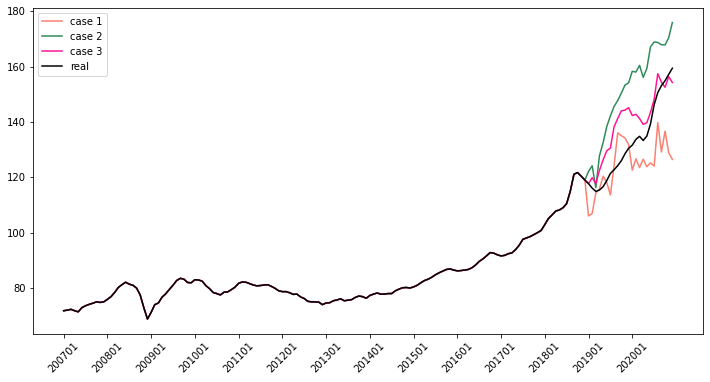

In [ ]:
plt.figure(figsize=(12, 6))
x_date = df.iloc[:,0]
plt.plot(x_date,case1, color="salmon")
plt.plot(x_date,case2, color="seagreen")
plt.plot(x_date,case3, color="deeppink")
plt.plot(x_date,y, color="black")
plt.legend(['case 1','case 2','case 3', 'real'])
plt.xticks(ticks=x_date, rotation=45)
plt.locator_params(axis='x', nbins=x_date.shape[0]/12)
plt.show()

In [ ]:
arr=[mean_squared_error(y_test,preds1), mean_squared_error(y_test,preds2), mean_squared_error(y_test,preds3)]
result=pd.DataFrame(arr).transpose()

In [ ]:
result

,0,1,2
0,191.04311,403.245199,86.701876


In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_lstm.csv'):
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_lstm.csv', index=False, mode='w', encoding='utf-8-sig')
else:
    result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI 2021/result_lstm.csv', index=False, mode='a', encoding='utf-8-sig', header=False)